# *CAPSTONE PROJECT 2 - DATABASE NORTHWIND*

## *BACKGROUND*

Northwind adalah sebuah perusahaan yang bergerak di bidang ekspor impor berbagai macam produk. Sebuah analisis diinginkan untuk mengetahui **gambaran dan performa pemasok / supplier produk Northwind**. Terdapat sebuah database yang menunjukkan profil singkat pemasok dan juga performanya dalam indikator order / pesanan. Analisis lanjutan akan dilakukan untuk mengetahui gambaran pemasok produk Northwind dan juga performanya untuk meningkatkan efisiensi.

## *DATABASE DESCRIPTION*

Database diambil dari https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database memiliki tabel-tabel sebagai berikut (tidak termasuk tabel demo seperti CustomerDemograpic dan CustomerDemo):
1. Region               : Deskripsi klasifikasi wilayah
2. Territories          : Deskripsi daerah administrasi
3. EmployeeTerritories  : Daerah administrasi asal pegawai
4. Employee             : Informasi umum pegawai Northwind
5. Shippers             : Informasi umum perusahaan pengiriman yang digunakan Northwind
6. Orders               : Informasi umum pesanan pelanggan (Informasi pelanggan, sales, order, dan juga perusahaan pengiriman)
7. Customers            : Informasi umum pelanggan Northwind
8. Orderdetails         : Detail produk, kuantitas, dan harga dari produk yang dipesan
9. Products             : Detail produk yang dijual Northwind
11. Supplier            : Perusahaan Supplier pemasok produk Northwind
12. Categories          : Kategori produk Northwind

## *DATABASE MANAGEMENT*

### *CONNECTING TO SQL*

Rangkaian kode ini dilakukan untuk menghubungkan database di SQL server ke Python. Hal ini merupakan langkah utama dalam analisis data. Langkah pertama dimulai dari mengimport library yang diperlukan dan menghubungkan SQL database ke Python. Setelah itu, kita akan menulis fungsi query agar data hasil query yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data.

In [332]:
# Import Library

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [333]:
# Connecting to SQL Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'human_resource'
)

In [334]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel = pd.DataFrame(result, columns=curs.column_names)
    return tabel

### *CREATING TABLE*

Data *tabel1* ini dibuat sebagai data utama untuk keperluan analisis lebih lanjut. Data ini dipilih dari gabungan data dari tabel **supplier** , **products** , **categories** , **orderdetails** , dan **order**. Informasi pada *tabel1* sudah difilter sesuai dengan kebutuhan analisis.

Tabel memiliki kolom-kolom sebagai berikut:
1. SupplierName     : Nama Supplier Northwind
2. SupplierID       : ID dari Supplier
3. CategoryName     : Nama Kategori Produk yang dipasok Supplier
4. ProductID        : ID dari Produk yang dipasok Supplier
5. ProductName      : Nama Produk yang dipasok Supplier
6. UnitPrice        : Harga Produk per Unit yang dipesan
7. Quantity         : Kuantitas Produk yang dipesan
8. Discount         : Diskon harga Produk yang diberikan
9. Order Total      : Rumus = Quantity * UnitPrice * (1-Discount). Menggambarkan jumlah pesanan suatu produk
10. OrderDate       : Tanggal terjadinya pesanan
11. Region          : Daerah asal Supplier
12. Country         : Negara asal Supplier

In [335]:
# Tabel1

tabel1=sql_table('''select s.CompanyName SupplierName, p.SupplierID, c.CategoryName, od.ProductID, p.ProductName, od.UnitPrice, 
od.Quantity, od.Discount, (od.Quantity * od.UnitPrice * (1 - od.Discount)) OrderTotal, o.OrderDate,
s.Region, s.Country from suppliers s
join products p on s.SupplierID=p.SupplierID
join categories c on p.CategoryID=c.CategoryID
join orderdetails od on p.ProductID=od.ProductID
join orders o on od.OrderID=o.OrderID;''')
tabel1

,SupplierName,SupplierID,CategoryName,ProductID,ProductName,UnitPrice,Quantity,Discount,OrderTotal,OrderDate,Region,Country
0,Exotic Liquids,1,Condiments,3,Aniseed Syrup,8.0000,30,0.0,240.0,1996-08-26,None,UK
1,Exotic Liquids,1,Condiments,3,Aniseed Syrup,8.0000,50,0.0,400.0,1997-01-06,None,UK
2,Exotic Liquids,1,Condiments,3,Aniseed Syrup,8.0000,20,0.0,160.0,1997-03-25,None,UK
3,Exotic Liquids,1,Condiments,3,Aniseed Syrup,10.0000,60,0.0,600.0,1997-05-19,None,UK
4,Exotic Liquids,1,Condiments,3,Aniseed Syrup,10.0000,14,0.0,140.0,1997-07-07,None,UK
...,...,...,...,...,...,...,...,...,...,...,...,...
2150,Forts d'rables,29,Condiments,61,Sirop d'rable,28.5000,7,0.0,199.5,1998-04-03,Qubec,Canada
2151,Forts d'rables,29,Condiments,61,Sirop d'rable,28.5000,6,0.0,171.0,1998-04-20,Qubec,Canada
2152,Forts d'rables,29,Condiments,61,Sirop d'rable,28.5000,4,0.0,114.0,1998-04-22,Qubec,Canada
2153,Forts d'rables,29,Condiments,61,Sirop d'rable,28.5000,10,0.0,285.0,1998-04-27,Qubec,Canada


*Tabel2* ini digunakan untuk memberikan gambaran umum mengenai tipe produk yang paling banyak dipesan oleh pelanggan yang dikelompokan sesuai kategori untuk melihat produk yang paling laris berdasarkan kategori dan asal supplier. Pada *Tabel2* ini, terdapat kolom baru, yaitu *SumProduct* untuk melihat jumlah produk yang dipesan dan *SumOrderTotal* untuk melihat keseluruhan pesanan.

In [336]:
# Tabel 2

tabel2=sql_table('''select s.CompanyName SupplierName, p.SupplierID, s.Country, c.CategoryName, 
count(od.ProductID) SumProduct, 
sum((od.Quantity * od.UnitPrice * (1 - od.Discount))) SumOrderTotal from suppliers s
join products p on s.SupplierID=p.SupplierID
join categories c on p.CategoryID=c.CategoryID
join orderdetails od on p.ProductID=od.ProductID
group by CategoryName,SupplierName;''')
tabel2

,SupplierName,SupplierID,Country,CategoryName,SumProduct,SumOrderTotal
0,Exotic Liquids,1,UK,Beverages,82,32836.80
1,Refrescos Americanas LTDA,10,Brazil,Beverages,51,4782.60
2,Bigfoot Breweries,16,USA,Beverages,65,23776.80
3,Aux joyeux ecclsiastiques,18,France,Beverages,54,163135.00
4,Leka Trading,20,Singapore,Beverages,28,25079.20
5,"Pavlova, Ltd.",7,Australia,Beverages,39,11472.00
6,Plutzer Lebensmittelgromrkte AG,12,Germany,Beverages,46,8650.55
7,Karkki Oy,23,Finland,Beverages,39,16794.00
8,Exotic Liquids,1,UK,Condiments,12,3080.00
9,New Orleans Cajun Delights,2,USA,Condiments,70,33351.95


## *DATA MANIPULATION - CHECKING ANOMALIES*

### *TABLE DESCRIPTION*

Pada bagian ini, kita melihat statistik deskriptif dari *tabel1* yang sudah dibuat, mulai dari jumlah data, tipe data, dan juga *unique value*. Terlihat tabel1 memiliki 2155 data berbeda. Secara keseluruhan, terdapat 29 supplier berbeda yang memasok 8 kategori produk ke Northwind dan berasal dari 17 negara berbeda.   

In [337]:
# Table Description

display(tabel1.describe())
display(tabel1.info())
display(tabel1.nunique())

,SupplierID,ProductID,Quantity,Discount,OrderTotal
count,2155.000000,2155.000000,2155.000000,2155.0,2155.000000
mean,14.488167,40.793039,23.812993,0.0,628.519067
std,8.228640,22.159019,19.022047,0.0,1036.466980
min,1.000000,1.000000,1.000000,0.0,4.800000
25%,7.000000,22.000000,10.000000,0.0,154.000000
50%,14.000000,41.000000,20.000000,0.0,360.000000
75%,21.000000,60.000000,30.000000,0.0,722.250000
max,29.000000,77.000000,130.000000,0.0,15810.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierName  2155 non-null   object        
 1   SupplierID    2155 non-null   int64         
 2   CategoryName  2155 non-null   object        
 3   ProductID     2155 non-null   int64         
 4   ProductName   2155 non-null   object        
 5   UnitPrice     2155 non-null   object        
 6   Quantity      2155 non-null   int64         
 7   Discount      2155 non-null   float64       
 8   OrderTotal    2155 non-null   float64       
 9   OrderDate     2155 non-null   datetime64[ns]
 10  Region        731 non-null    object        
 11  Country       2155 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 202.2+ KB


None

SupplierName     29
SupplierID       29
CategoryName      8
ProductID        77
ProductName      77
UnitPrice       116
Quantity         55
Discount          1
OrderTotal      848
OrderDate       480
Region            8
Country          17
dtype: int64

### *ANOMALIES*

Sekilas, ada dua anomali yang perlu ditangani dengan segera. Berikut adalah anomali tersebut.

1. Missing Values

Terlihat banyak nilai kosong pada kolom Region, hingga mencapai 66% dari total data yang ada, sedangkan tidak ada nilai kosong pada kolom lainnya.

2. Wrong Data Type

Pada tabel info, terlihat ada 4 tipe data, yaitu datetime (waktu), float (angka), integer (angka), dan object (huruf). Dapat terlihat kolom UnitPrice memiliki tipe data object. Hal tersebut adalah salah dikarenakan UnitPrice seharusnya berbentuk angka, sehingga harus diubah menjadi tipe numerik.    

### *HANDLING MISSING VALUES*

Pada bagian ini, kita akan menangani munculnya nilai kosong yang ada pada tabel. Terlihat banyak nilai kosong pada kolom Region, hingga mencapai 66% dari total data yang ada, sedangkan tidak ada nilai kosong pada kolom lainnya. **Maka perlakuan yang sesuai adalah menghapus kolom Region pada Tabel1.**

In [338]:
# Checking Missing Values

tabel1.isnull().sum()

SupplierName       0
SupplierID         0
CategoryName       0
ProductID          0
ProductName        0
UnitPrice          0
Quantity           0
Discount           0
OrderTotal         0
OrderDate          0
Region          1424
Country            0
dtype: int64

In [339]:
# Drop Region Column

tabel1.drop(['Region'], axis=1, inplace = True)

In [340]:
# Checking Missing Values After Treatment

display(tabel1.info())
display(tabel1.isnull().sum())
display(tabel1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierName  2155 non-null   object        
 1   SupplierID    2155 non-null   int64         
 2   CategoryName  2155 non-null   object        
 3   ProductID     2155 non-null   int64         
 4   ProductName   2155 non-null   object        
 5   UnitPrice     2155 non-null   object        
 6   Quantity      2155 non-null   int64         
 7   Discount      2155 non-null   float64       
 8   OrderTotal    2155 non-null   float64       
 9   OrderDate     2155 non-null   datetime64[ns]
 10  Country       2155 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 185.3+ KB


None

SupplierName    0
SupplierID      0
CategoryName    0
ProductID       0
ProductName     0
UnitPrice       0
Quantity        0
Discount        0
OrderTotal      0
OrderDate       0
Country         0
dtype: int64

,SupplierName,SupplierID,CategoryName,ProductID,ProductName,UnitPrice,Quantity,Discount,OrderTotal,OrderDate,Country
0,Exotic Liquids,1,Condiments,3,Aniseed Syrup,8.0000,30,0.0,240.0,1996-08-26,UK
1,Exotic Liquids,1,Condiments,3,Aniseed Syrup,8.0000,50,0.0,400.0,1997-01-06,UK
2,Exotic Liquids,1,Condiments,3,Aniseed Syrup,8.0000,20,0.0,160.0,1997-03-25,UK
3,Exotic Liquids,1,Condiments,3,Aniseed Syrup,10.0000,60,0.0,600.0,1997-05-19,UK
4,Exotic Liquids,1,Condiments,3,Aniseed Syrup,10.0000,14,0.0,140.0,1997-07-07,UK
...,...,...,...,...,...,...,...,...,...,...,...
2150,Forts d'rables,29,Condiments,61,Sirop d'rable,28.5000,7,0.0,199.5,1998-04-03,Canada
2151,Forts d'rables,29,Condiments,61,Sirop d'rable,28.5000,6,0.0,171.0,1998-04-20,Canada
2152,Forts d'rables,29,Condiments,61,Sirop d'rable,28.5000,4,0.0,114.0,1998-04-22,Canada
2153,Forts d'rables,29,Condiments,61,Sirop d'rable,28.5000,10,0.0,285.0,1998-04-27,Canada


### *HANDLING WRONG DATA TYPE*

Sesuai dengan penjelasan pada bagian anomali sebelumnya, kita akan mengubah tipe data kolom UnitPrice menjadi data numerik. Setelah diubah, terlihat tipe data UnitPrice berbuah menjadi float, menandakan data UnitPrice terlihat berubah menjadi data numerik, sehingga analisis bisa dilanjutkan dengan baik.

In [341]:
# Change Data Type dan Recheck

tabel1['UnitPrice'] = pd.to_numeric(tabel1['UnitPrice'])
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierName  2155 non-null   object        
 1   SupplierID    2155 non-null   int64         
 2   CategoryName  2155 non-null   object        
 3   ProductID     2155 non-null   int64         
 4   ProductName   2155 non-null   object        
 5   UnitPrice     2155 non-null   float64       
 6   Quantity      2155 non-null   int64         
 7   Discount      2155 non-null   float64       
 8   OrderTotal    2155 non-null   float64       
 9   OrderDate     2155 non-null   datetime64[ns]
 10  Country       2155 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 185.3+ KB


### *CHECKING DUPLICATES*

Selanjutnya, kita akan mencari data duplikat. Data yang bersifat duplikat ini akan mengganggu proses analisis data. Pada bagian ini, terlihat ada data duplikat yang terdapat pada *tabel1*. Perlakuan yang tepat untuk data duplikat ini, adalah dengan menghapus data tersebut.

In [342]:
# Checking Duplicates

tabel1.loc[tabel1.duplicated(), :]

,SupplierName,SupplierID,CategoryName,ProductID,ProductName,UnitPrice,Quantity,Discount,OrderTotal,OrderDate,Country
186,Grandma Kelly's Homestead,3,Produce,7,Uncle Bob's Organic Dried Pears,30.0,60,0.0,1800.0,1998-03-31,USA
722,Refrescos Americanas LTDA,10,Beverages,24,Guaran Fantstica,3.6,15,0.0,54.0,1996-12-18,Brazil
1374,Aux joyeux ecclsiastiques,18,Beverages,38,Cte de Blaye,263.5,30,0.0,7905.0,1998-01-06,France


In [343]:
# Dropping Duplicates and Recheck

tabel1.drop_duplicates(keep=False, inplace=True)
display(tabel1.info())
display(tabel1.loc[tabel1.duplicated(), :])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2154
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierName  2149 non-null   object        
 1   SupplierID    2149 non-null   int64         
 2   CategoryName  2149 non-null   object        
 3   ProductID     2149 non-null   int64         
 4   ProductName   2149 non-null   object        
 5   UnitPrice     2149 non-null   float64       
 6   Quantity      2149 non-null   int64         
 7   Discount      2149 non-null   float64       
 8   OrderTotal    2149 non-null   float64       
 9   OrderDate     2149 non-null   datetime64[ns]
 10  Country       2149 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 201.5+ KB


None

,SupplierName,SupplierID,CategoryName,ProductID,ProductName,UnitPrice,Quantity,Discount,OrderTotal,OrderDate,Country


### *ANOTHER ANOMALIES*

Selain dari dua anomalis utama diatas, ternyata masih terdapat anomali lainnya, yaitu terdapat 2 negara Sweden yang menjadi nilai unik. Hal ini terjadi karena adanya perbedaan spasi ("Sweden" dan "Sweden ") yang menjadikan kedua data tersebut dikategorikan menjadi unique values. Hal ini dapat mengakibatkan analisis data menjadi tidak akurat dan harus diatasi. Spasi pada data "Sweden " harus dihapus agar data masuk negara Sweden menjadi unique value tunggal.

In [344]:
# Checking Country Column Unique Values

tabel1['Country'].unique()

array(['UK', 'USA', 'Japan', 'Spain', 'Australia', 'Sweden ', 'Brazil',
       'Germany', 'Italy', 'Norway', 'Sweden', 'France', 'Singapore',
       'Denmark', 'Netherlands', 'Finland', 'Canada'], dtype=object)

In [345]:
# Delete Any Space (" ") on Country Column

tabel1['Country'] = tabel1['Country'].str.strip()

In [346]:
# Recheck Data

tabel1['Country'].unique()

array(['UK', 'USA', 'Japan', 'Spain', 'Australia', 'Sweden', 'Brazil',
       'Germany', 'Italy', 'Norway', 'France', 'Singapore', 'Denmark',
       'Netherlands', 'Finland', 'Canada'], dtype=object)

### *DATA OUTLIER*

Data outlier atau data pencilan adalah data yang terpaut jauh dari titik data lainnya. Pencilan kemungkinan dapat berasal dari variabilitas pengukuran atau galat percobaan. Umumnya, pencilan sering kali diabaikan, namun pada analisis kali ini, data pencilan tetap dimasukkan pada analisis karena dinilai masih diperlukan untuk analisis data.
Mengidentifikasi data pencilan dapat dilakukan dengan menggunakan boxplot. Terlihat seluruh data numerik untuk keperluan analisis memiliki data pencilan, kecuali data Discount yang hanya memiliki nilai 0.

In [347]:
# Import Library

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\surja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OrderTotal'>

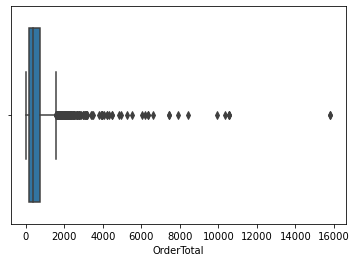

In [348]:
sns.boxplot(tabel1['OrderTotal'])

C:\Users\surja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

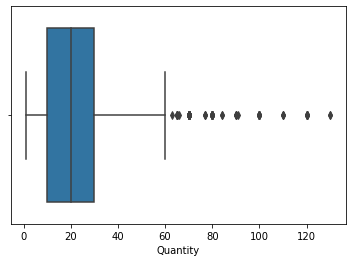

In [349]:
sns.boxplot(tabel1['Quantity'])

C:\Users\surja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

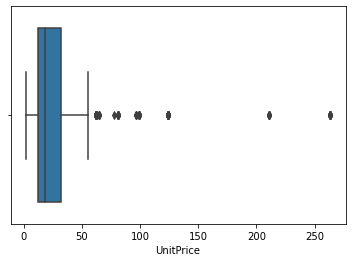

In [350]:
sns.boxplot(tabel1['UnitPrice'])

C:\Users\surja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

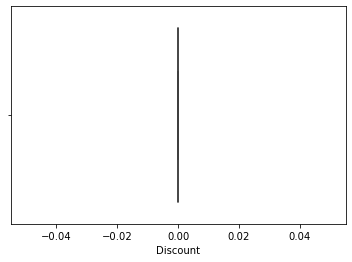

In [351]:
sns.boxplot(tabel1['Discount'])

### *RECHECK DATA*

Penanganan anomali sudah selesai, dan data *Tabel1* akan dicek ulang untuk memastikan data yang akan digunakan sudah bersih untuk dilakukan analisis lanjutan.

In [352]:
# Recheck Table

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2154
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierName  2149 non-null   object        
 1   SupplierID    2149 non-null   int64         
 2   CategoryName  2149 non-null   object        
 3   ProductID     2149 non-null   int64         
 4   ProductName   2149 non-null   object        
 5   UnitPrice     2149 non-null   float64       
 6   Quantity      2149 non-null   int64         
 7   Discount      2149 non-null   float64       
 8   OrderTotal    2149 non-null   float64       
 9   OrderDate     2149 non-null   datetime64[ns]
 10  Country       2149 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 201.5+ KB


In [353]:
# Sample Table

tabel1.sample(15)

,SupplierName,SupplierID,CategoryName,ProductID,ProductName,UnitPrice,Quantity,Discount,OrderTotal,OrderDate,Country
1817,"G'day, Mate",24,Grains/Cereals,52,Filo Mix,7.00,2,0.0,14.00,1998-05-06,Australia
1539,Leka Trading,20,Condiments,44,Gula Malacca,19.45,40,0.0,778.00,1997-05-28,Singapore
1877,Ma Maison,25,Meat/Poultry,55,Pt chinois,24.00,30,0.0,720.00,1998-02-23,Canada
1477,New England Seafood Cannery,19,Seafood,41,Jack's New England Clam Chowder,9.65,35,0.0,337.75,1997-11-19,USA
2135,Forts d'rables,29,Condiments,61,Sirop d'rable,28.50,15,0.0,427.50,1997-04-22,Canada
856,Plutzer Lebensmittelgromrkte AG,12,Meat/Poultry,29,Thringer Rostbratwurst,99.00,15,0.0,1485.00,1996-08-27,Germany
729,Refrescos Americanas LTDA,10,Beverages,24,Guaran Fantstica,4.50,5,0.0,22.50,1997-04-25,Brazil
2110,Forts d'rables,29,Confections,62,Tarte au sucre,49.30,9,0.0,443.70,1997-11-19,Canada
320,Cooperativa de Quesos 'Las Cabras',5,Dairy Products,12,Queso Manchego La Pastora,38.00,2,0.0,76.00,1998-05-06,Spain
350,Mayumi's,6,Seafood,13,Konbu,6.00,15,0.0,90.00,1998-03-11,Japan


## *DATA VISUALIZATION AND STATISTICS ANALYSIS*

Pada bagian ini, dilakukan analisis mendalam melalui visualisasi data dan juga analisis statistik pada data yang sudah diolah di bagian sebelumnya. Dari analisis ini, dapat disimpulkan gambaran keadaan yang terjadi di kasus Northwind dan juga implikasi manajerialnya.

### *DESCRIPTIVE ANALYSIS - ORDERS*

Pada bagian ini, akan dilihat gambaran umum dari produk- produk yang paling banyak dipesan oleh konsumen.

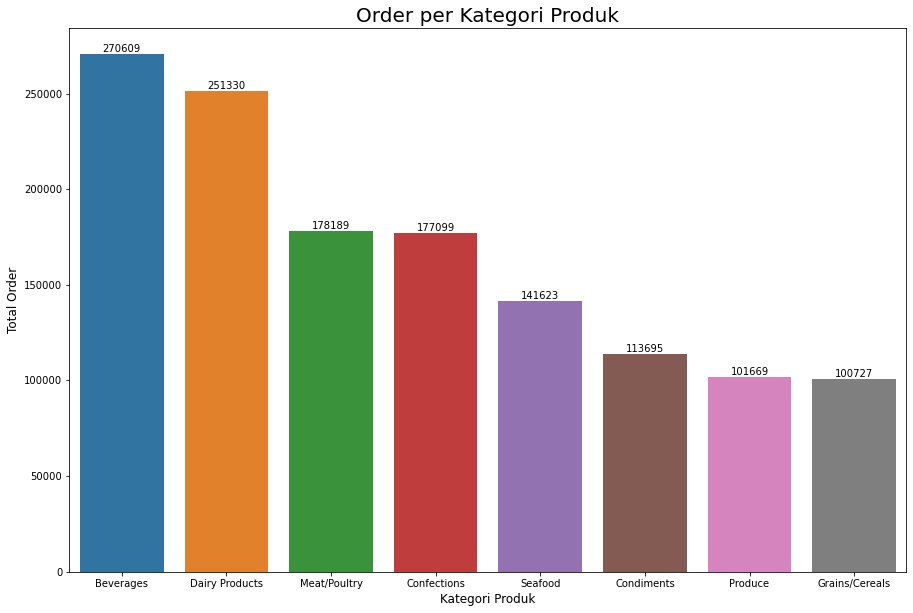

Total Order Semua Produk = 1334940.5899999999


In [354]:
# Order per Kategori Produk

df_category=tabel1.groupby(tabel1['CategoryName']).sum().sort_values('OrderTotal',ascending=False)
plt.figure(figsize=(15,10))
df_category1=sns.barplot(x='CategoryName',y='OrderTotal',ci=None, data=df_category.reset_index())
df_category1.bar_label(df_category1.containers[0])
plt.xlabel('Kategori Produk', size = 12)
plt.ylabel('Total Order', size = 12)
plt.title ('Order per Kategori Produk', size = 20)
plt.show()
print('Total Order Semua Produk = {}'.format(tabel1['OrderTotal'].sum()))

Pada grafik di atas, terlihat gambaran produk- produk dengan nilai pesanan terbesar. 
<br>
Terlihat produk minuman dan susu merupakan dua produk dengan nilai pesanan tertinggi, disusul oleh produk daging dan permen. Hal ini menggambarkan besarnya peminat pelanggan pada produk- produk ini, sehingga stok produk harus tetap terjaga dan perusahaan sebaiknya terus menjalin hubungan erat dengan para supplier produk- produk prioritas ini.

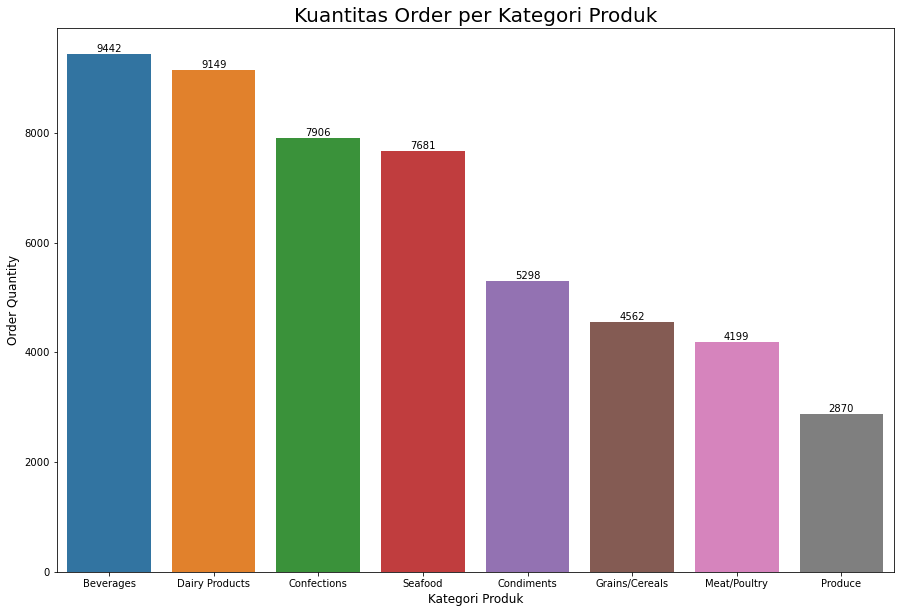

Total Kuantitas Order Semua Produk = 51107


In [355]:
# Kuantitas Order per Kategori Produk

df_categoryq=tabel1.groupby(tabel1['CategoryName']).sum().sort_values('Quantity',ascending=False)
plt.figure(figsize=(15,10))
df_category2=sns.barplot(x='CategoryName',y='Quantity',ci=None, data=df_categoryq.reset_index())
df_category2.bar_label(df_category2.containers[0])
plt.xlabel('Kategori Produk', size = 12)
plt.ylabel('Order Quantity', size = 12)
plt.title ('Kuantitas Order per Kategori Produk', size = 20)
plt.show()
print('Total Kuantitas Order Semua Produk = {}'.format(tabel1['Quantity'].sum()))

Pada grafik di atas, terlihat gambaran produk- produk dengan kuantitas pesanan terbesar. 
<br>
Terlihat produk minuman dan susu masih menunjukkan nilai tertinggi. Namun, peringkat ketiga diisi oleh produk permen, sedangkan produk daging memiliki kuantitas yang kecil. Hal ini menunjukkan produk minuman dan susu memang produk yang paling diminati konsumen, namun produk daging memiliki kuantitas yang kecil, namun nilai pesanan yang besar dikarenakan mahalnya harga produk tersebut.

In [356]:
# Gambaran Nilai Order per Tahun

tahun=tabel1[['OrderDate', 'Quantity' ,'OrderTotal']].groupby(pd.DatetimeIndex(tabel1['OrderDate']).year).sum()
bulan=tabel1[['OrderDate', 'Quantity' ,'OrderTotal']].groupby(pd.DatetimeIndex(tabel1['OrderDate']).month).sum()
tahun

,Quantity,OrderTotal
OrderDate,,
1996,9551,226190.50
1997,25489,658388.75
1998,16067,450361.34


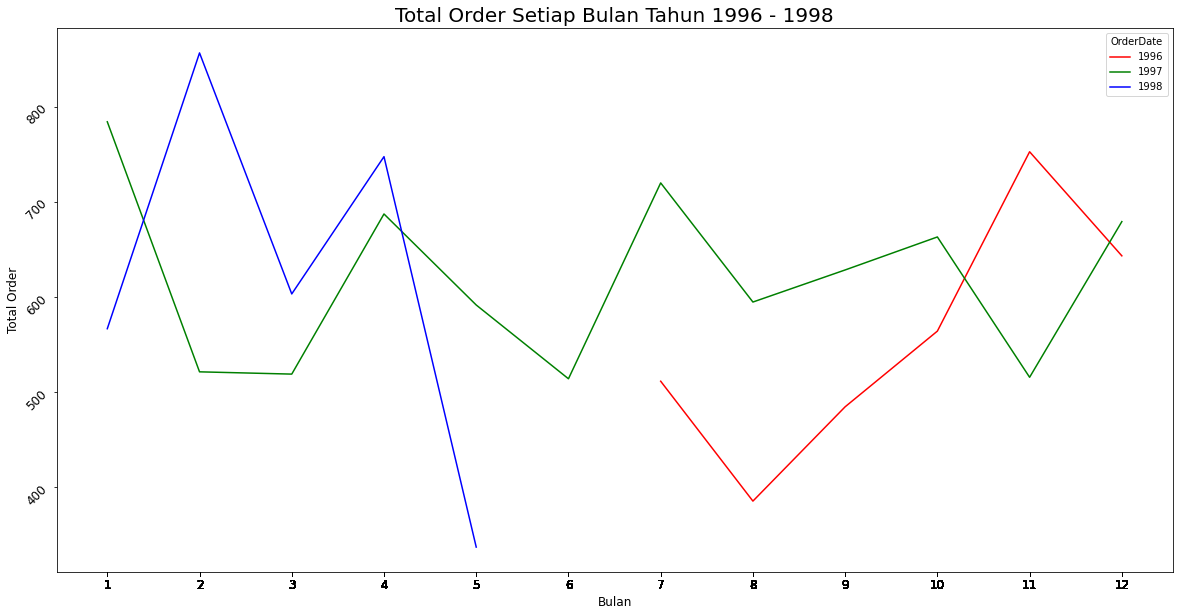

In [357]:
# Total Order Setiap Bulan Tahun 1996 - 1998

plt.figure(figsize=(20,10))
sns.lineplot(data=tabel1, x=pd.DatetimeIndex(tabel1['OrderDate']).month, y='OrderTotal', 
             hue = pd.DatetimeIndex(tabel1['OrderDate']).year,ci=None,palette=['r','g','b'])
plt.title('Total Order Setiap Bulan Tahun 1996 - 1998', size = 20)
plt.xlabel('Bulan', size = 12)
plt.ylabel('Total Order', size = 12)
plt.xticks(pd.DatetimeIndex(tabel1['OrderDate']).month, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.show()

In [358]:
# Unique Values OrderDate bulan Mei 1997 vs 1998

display(tabel1[(tabel1['OrderDate']>='1998-05-01') & (tabel1['OrderDate']<'1998-06-01')].nunique())
display(tabel1[(tabel1['OrderDate']>='1997-05-01') & (tabel1['OrderDate']<'1997-06-01')].nunique())

SupplierName    23
SupplierID      23
CategoryName     8
ProductID       40
ProductName     40
UnitPrice       37
Quantity        23
Discount         1
OrderTotal      54
OrderDate        4
Country         14
dtype: int64

SupplierName    28
SupplierID      28
CategoryName     8
ProductID       55
ProductName     55
UnitPrice       47
Quantity        27
Discount         1
OrderTotal      82
OrderDate       22
Country         15
dtype: int64

Grafik dan data diatas menggambarkan perkembangan nilai pesanan sepanjang tahun 1996 hingga 1998 yang dibagi per bulan. Terlihat data untuk bulan 1996 dan 1998 terbatas hanya beberapa bulan sedangkan data tahun 1997 lengkap selama satu tahun.
<br>
Dari pola grafik terlihat cenderung acak, namun terlihat persamaan antara bulan Agustus tahun 1996 dan 1997 (tren menurun) dan bulan April tahun 1997 dan 1998 (tren meningkat).
<br>
Terlihat perbedaan mencolok antara bulan Mei tahun 1997 dan 1998. Hal ini disebabkan oleh dataset tahun 1998 hanya terbatas. Bila dilihat dari unique value, terlihat pada tahun 1998, hanya ada 4 tanggal sedangkan pada tahun 1997, terdapat 22 tanggal. Hal tersebut mempengaruhi nilai order pada bulan tersebut.

### *DATA VISUALIZATION - SUPPLIERS*

Pada bagian ini, akan dilihat gambaran umum dari supplier Northwind.

C:\Users\surja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


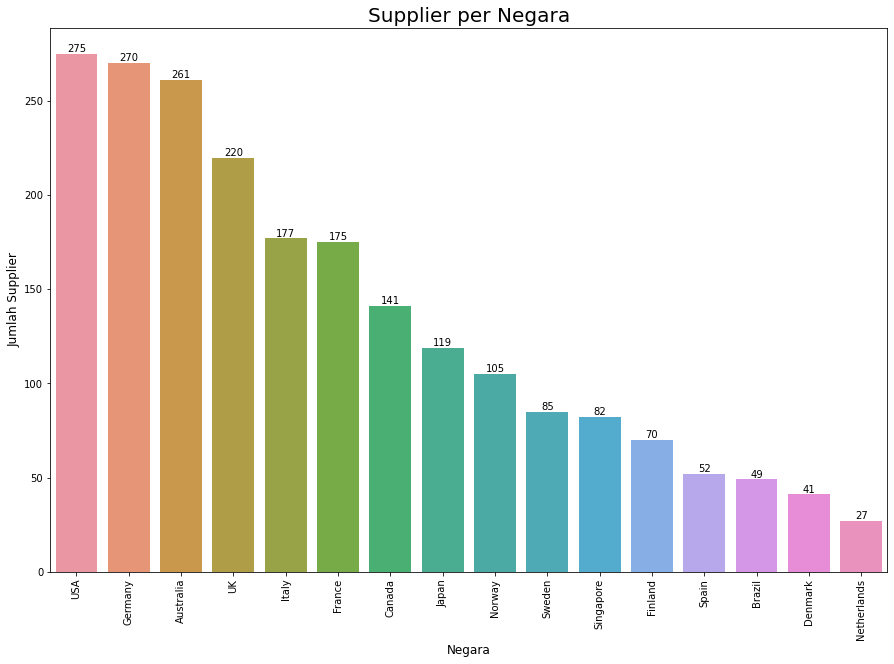

In [359]:
# Supplier per Negara

plt.figure(figsize=(15,10))
df_country=sns.countplot(tabel1['Country'],order = tabel1['Country'].value_counts().index)
df_country.bar_label(df_country.containers[0])
plt.xlabel('Negara', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Jumlah Supplier', size = 12)
plt.title ('Supplier per Negara', size = 20)
plt.show()

Pada grafik di atas, terlihat gambaran negara asal supplier. 
<br>
Terlihat supplier dari negara AS, Jerman, dan Australia mendominasi jumlah supplier Northwind dibandingkan dengan negara- negara lainnya.

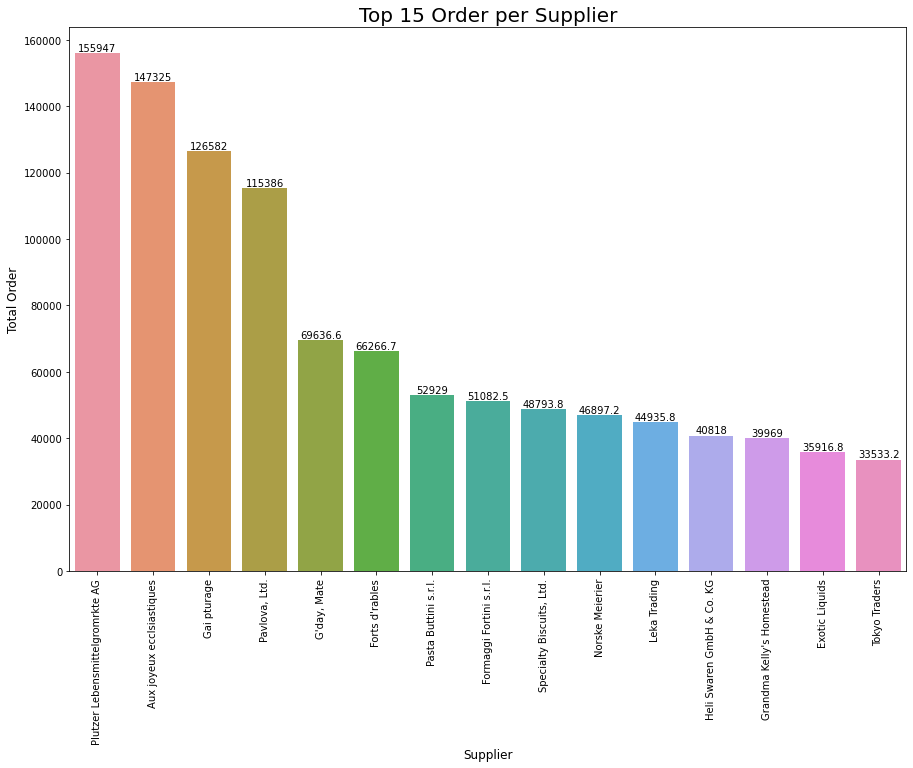

In [360]:
# Top 15 Order per Supplier

df_supplier=tabel1.groupby(tabel1['SupplierName']).sum().sort_values('OrderTotal',ascending=False).head(15)
plt.figure(figsize=(15,10))
df_supplier1=sns.barplot(x='SupplierName',y='OrderTotal',ci=None, data=df_supplier.reset_index())
df_supplier1.bar_label(df_supplier1.containers[0])
plt.xlabel('Supplier', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Total Order', size = 12)
plt.title ('Top 15 Order per Supplier', size = 20)
plt.show()

Pada grafik di atas, terlihat gambaran supplier dengan nilai pesanan terbesar. 

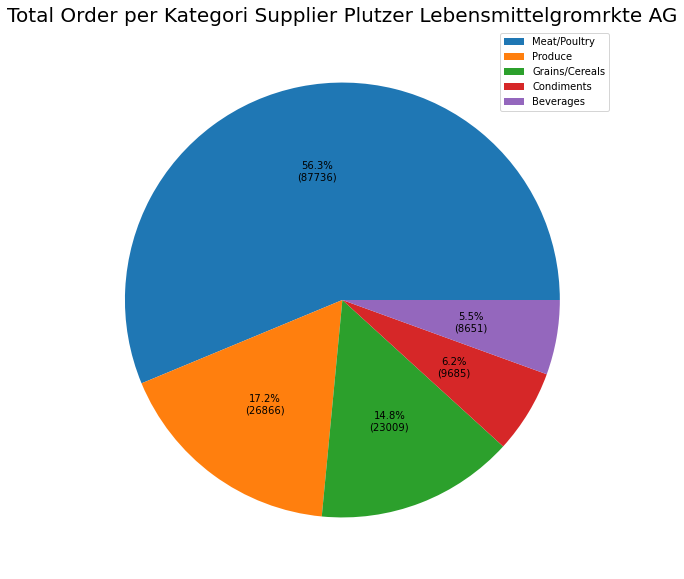

In [361]:
# Total Order per Kategori Supplier Plutzer Lebensmittelgromrkte AG

df_sp=tabel1[tabel1['SupplierName']=='Plutzer Lebensmittelgromrkte AG'].groupby(tabel1['CategoryName']).sum().sort_values('OrderTotal',ascending=False)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,10))
plt.pie(df_sp['OrderTotal'],autopct=autopct_format(df_sp['OrderTotal']))
plt.title ('Total Order per Kategori Supplier Plutzer Lebensmittelgromrkte AG', size = 20)
plt.legend(df_sp.index)
plt.show()

Supplier dengan nilai pesanan terbesar adalah Plutzer Lebensmittelgromrkte AG. Supplier ini banyak memasok produk daging pada Northwind dan juga memasok bahan- bahan mentah lainnya. Northwind sangat bergantung pada Plutzer Lebensmittelgromrkte AG untuk memasok produk daging dan bahan mentah. Oleh karena itu, penting menjaga hubungan baik dengan Plutzer Lebensmittelgromrkte AG namun disisi lain, ada baiknya Northwind lebih mendiversifikasikan suppliernya agar tidak terlalu bergantung pada satu perusahaan.

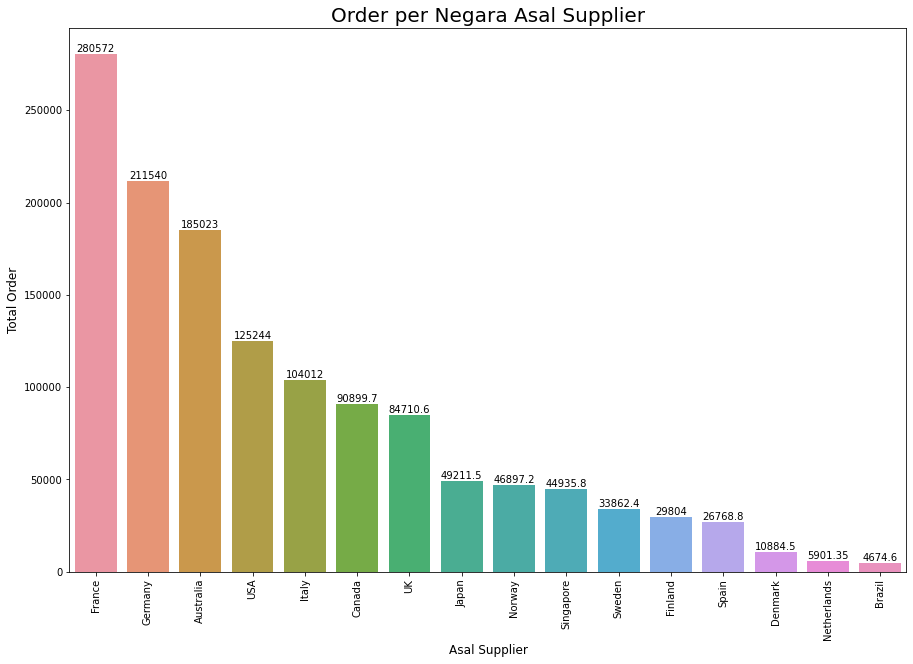

In [362]:
# Order per Negara Asal Supplier

df_negara=tabel1.groupby(tabel1['Country']).sum().sort_values('OrderTotal',ascending=False)
plt.figure(figsize=(15,10))
df_negara1=sns.barplot(x='Country',y='OrderTotal',ci=None, data=df_negara.reset_index())
df_negara1.bar_label(df_negara1.containers[0])
plt.xlabel('Asal Supplier', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Total Order', size = 12)
plt.title ('Order per Negara Asal Supplier', size = 20)
plt.show()

Pada grafik di atas, terlihat gambaran nilai pesanan berdasarkan negara asal supplier. 
<br>
Terlihat supplier dari Prancis sangat mendominasi nilai pesanan produk Northwind, disusul Jerman dan Australia. Hal ini kemungkinan diakibatkan oleh produk- produk Prancis yang mahal dan juga banyak dipesan oleh pelanggan. Hal tersebut akan dianalisis lebih lanjut.
<br>
Hal lain yang menarik adalah supplier asal AS hanya berada di posisi 4 untuk urutan nilai pesanan walaupun jumlah suppliernya merupakan yang terbanyak. Hal ini dimungkinkan karena sebagian besar produk dari supplier AS merupakan produk -produk dengan nilai pesanan yang rendah.

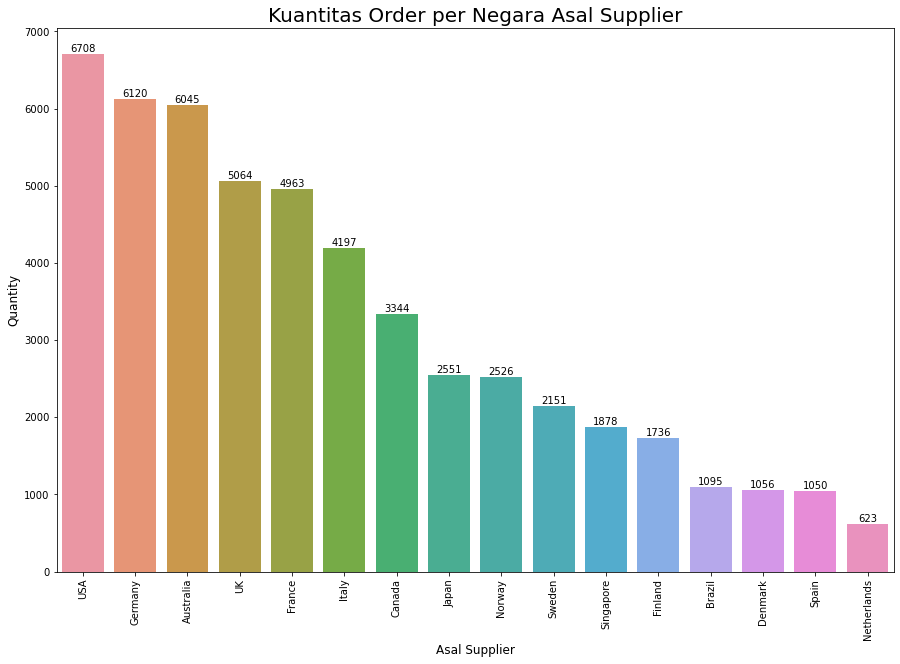

In [363]:
# Kuantitas Order per Negara Asal Supplier

df_negara=tabel1.groupby(tabel1['Country']).sum().sort_values('Quantity',ascending=False)
plt.figure(figsize=(15,10))
df_negara1=sns.barplot(x='Country',y='Quantity',ci=None, data=df_negara.reset_index())
df_negara1.bar_label(df_negara1.containers[0])
plt.xlabel('Asal Supplier', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Quantity', size = 12)
plt.title ('Kuantitas Order per Negara Asal Supplier', size = 20)
plt.show()

Pada grafik di atas, terlihat gambaran kuantitas pesanan berdasarkan negara asal supplier. 
<br>
Terlihat supplier dari Prancis justru berada di peringkat 5 sedangkan peringkat 1 hingga 3 diisi oleh AS, Jerman, dan Australia
<br>
Grafik diatas mendukung asumsi awal, yang menyatakan Prancis banyak menjual produk- produk premium, sehingga nilai pesanannya terlihat besar.

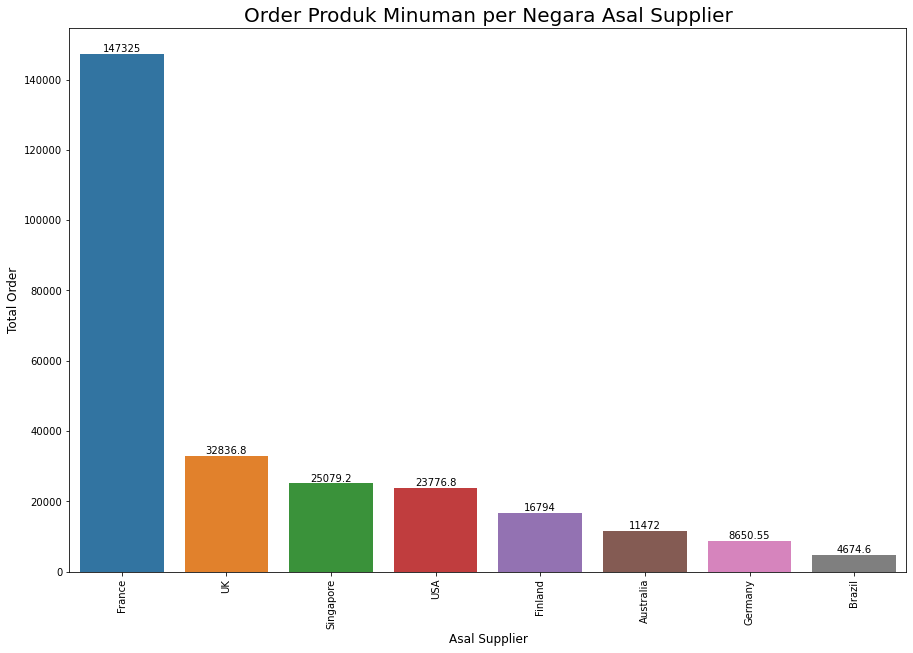

In [364]:
# Order Produk Minuman per Negara Asal Supplier

df_beverage=tabel1[tabel1['CategoryName']=='Beverages'].groupby(tabel1['Country']).sum().sort_values('OrderTotal',ascending=False)
df_beverage
plt.figure(figsize=(15,10))
df_beverage=sns.barplot(x='Country',y='OrderTotal',ci=None, data=df_beverage.reset_index())
df_beverage.bar_label(df_beverage.containers[0])
plt.xlabel('Asal Supplier', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Total Order', size = 12)
plt.title ('Order Produk Minuman per Negara Asal Supplier', size = 20)
plt.show()

Pada grafik di atas, terlihat gambaran nilai pesanan produk minuman berdasarkan negara asal supplier. 
<br>
Produk minuman dipilih karena produk kategori tersebut merupakan produk dengan nilai pesanan yang terbesar
<br>
Terlihat supplier Prancis sangat mendominasi dalam hal nilai pesanan. Hal ini menunjukkan Northwind sangat bergantung pada supplier Prancis dalam memasok produk- produk minuman yang nilai pesanannya tinggi.

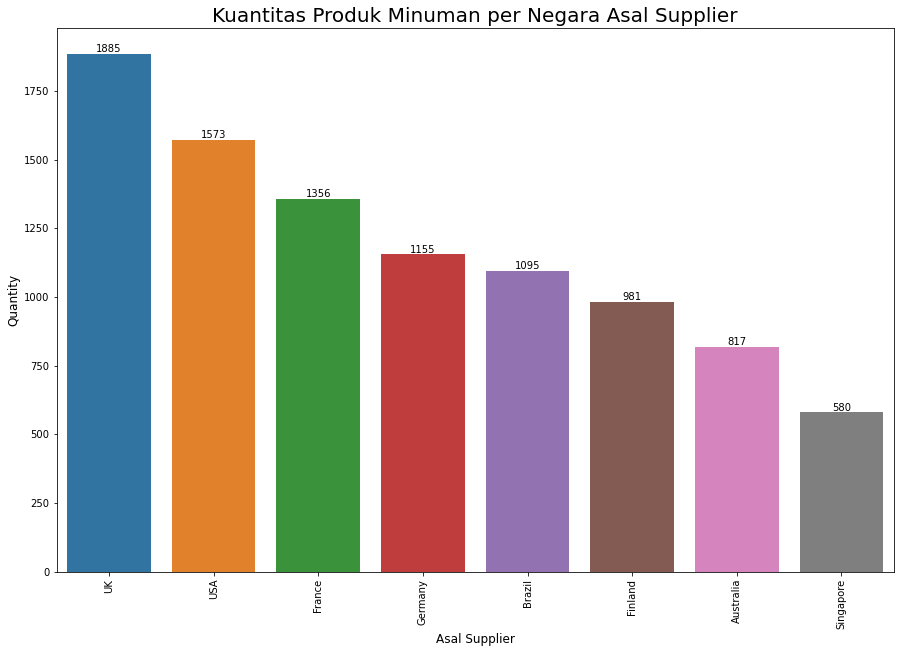

In [365]:
# Kuantitas Produk Minuman per Negara Asal Supplier

df_beverage=tabel1[tabel1['CategoryName']=='Beverages'].groupby(tabel1['Country']).sum().sort_values('Quantity',ascending=False)
df_beverage
plt.figure(figsize=(15,10))
df_beverage=sns.barplot(x='Country',y='Quantity',ci=None, data=df_beverage.reset_index())
df_beverage.bar_label(df_beverage.containers[0])
plt.xlabel('Asal Supplier', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Quantity', size = 12)
plt.title ('Kuantitas Produk Minuman per Negara Asal Supplier', size = 20)
plt.show()

Namun, bila dilihat dari data kuantitas pesanan, Northwind terlihat mampu mendiversifikasikan supplier produk minuman dengan baik. Maka dapat disimpulkan bahwa produk- produk minuman yang dipasok oleh Prancis adalah produk- produk minuman premium dengan nilai UnitPrice tinggi.

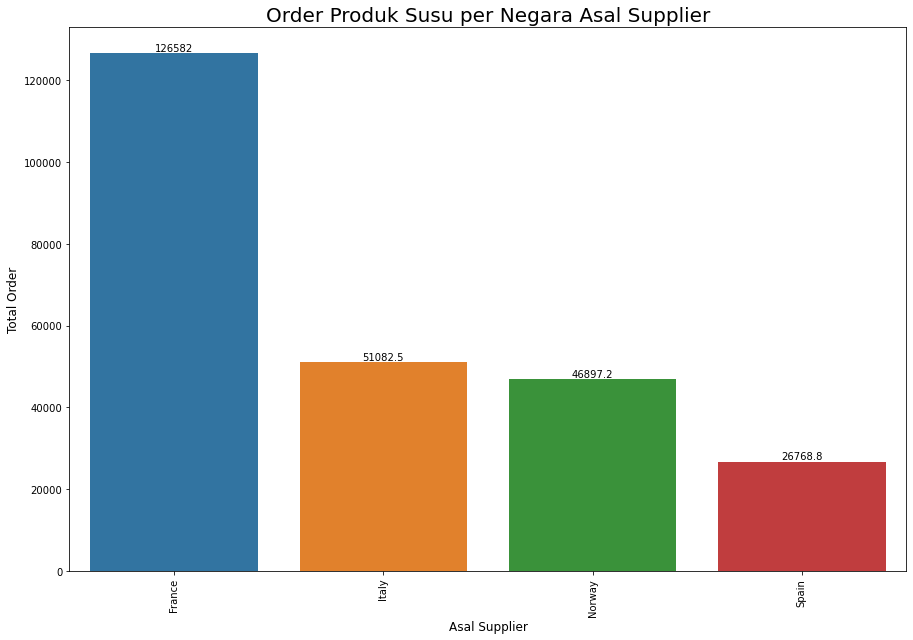

In [366]:
# Order Produk Susu per Negara Asal Supplier

df_dairy=tabel1[tabel1['CategoryName']=='Dairy Products'].groupby(tabel1['Country']).sum().sort_values('OrderTotal',ascending=False)
plt.figure(figsize=(15,10))
df_dairy=sns.barplot(x='Country',y='OrderTotal',ci=None, data=df_dairy.reset_index())
df_dairy.bar_label(df_dairy.containers[0])
plt.xlabel('Asal Supplier', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Total Order', size = 12)
plt.title ('Order Produk Susu per Negara Asal Supplier', size = 20)
plt.show()

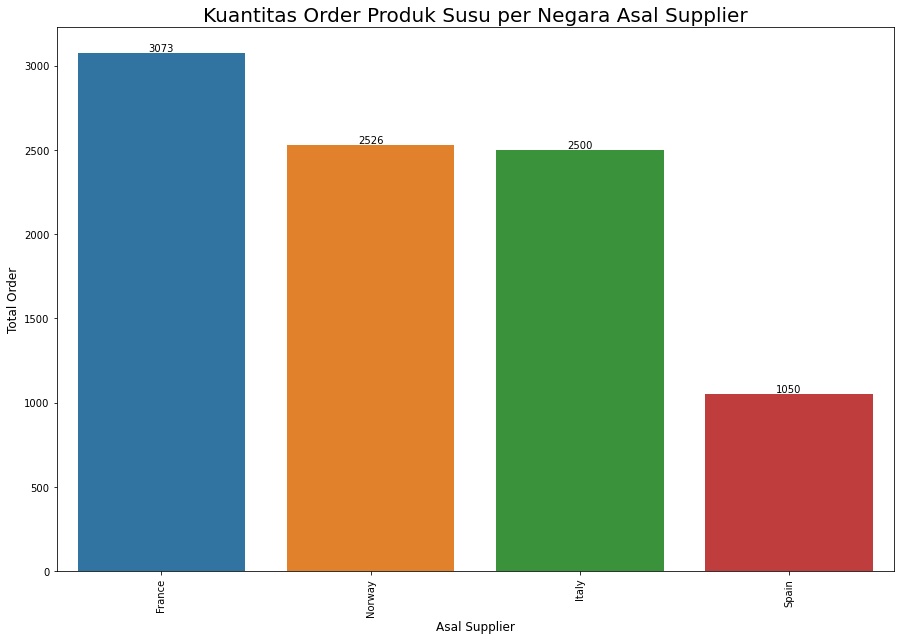

In [367]:
# Kuantitas Order Produk Susu per Negara Asal Supplier

df_dairy=tabel1[tabel1['CategoryName']=='Dairy Products'].groupby(tabel1['Country']).sum().sort_values('Quantity',ascending=False)
plt.figure(figsize=(15,10))
df_dairy=sns.barplot(x='Country',y='Quantity',ci=None, data=df_dairy.reset_index())
df_dairy.bar_label(df_dairy.containers[0])
plt.xlabel('Asal Supplier', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Total Order', size = 12)
plt.title ('Kuantitas Order Produk Susu per Negara Asal Supplier', size = 20)
plt.show()

Kasus pada produk minuman terjadi juga pada produk susu. Secara nilai pesanan, Prancis sangat mendominasi. Secara kuantitas juga Prancis terlihat mendominasi. Hal ini menunjukkan bahwa Northwind sangat bergantung pada Prancis untuk pasokan produk susu. Ada baiknya Northwind dapat melakukan intensifikasi terhadap supplier susu dari Prancis agar mampu menjaga stok produk dengan baik.

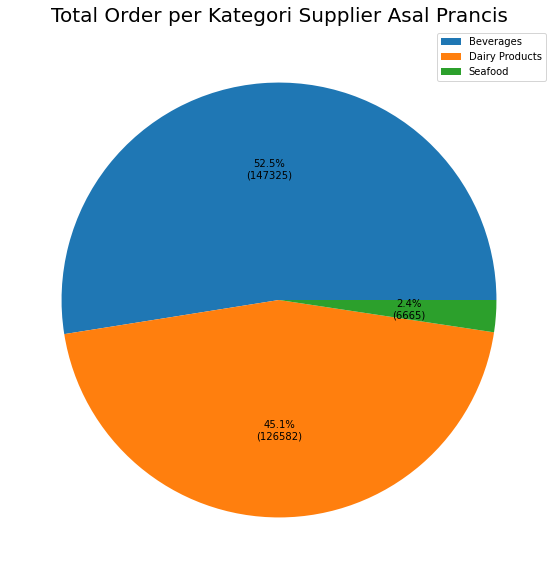

Total Order Supplier Asal Prancis=280571.75


In [368]:
# Total Order per Kategori Supplier Asal Prancis

df_france=tabel1[tabel1['Country']=='France'].groupby(tabel1['CategoryName']).sum().sort_values('OrderTotal',ascending=False)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,10))
plt.pie(df_france['OrderTotal'],autopct=autopct_format(df_france['OrderTotal']))
plt.title ('Total Order per Kategori Supplier Asal Prancis', size = 20)
plt.legend(df_france.index)
plt.show()
print('Total Order Supplier Asal Prancis={}'.format(df_france['OrderTotal'].sum()))

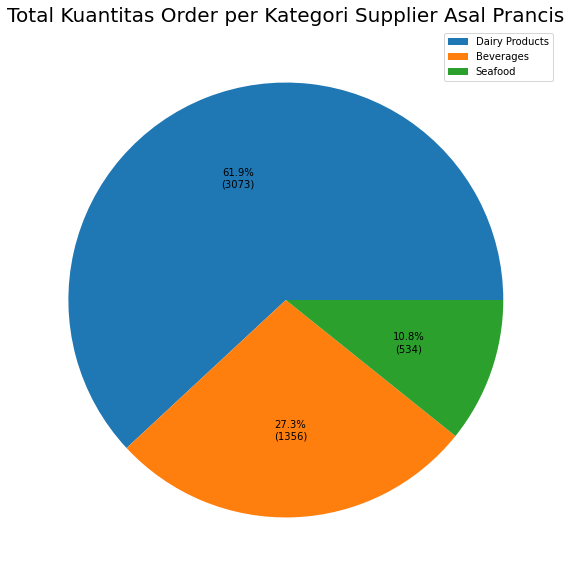

Total Kuantitas Order Supplier Asal Prancis=4963


In [369]:
# Total Kuantitas Order per Kategori Supplier Asal Prancis

df_france1=tabel1[tabel1['Country']=='France'].groupby(tabel1['CategoryName']).sum().sort_values('Quantity',ascending=False)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,10))
plt.pie(df_france1['Quantity'],autopct=autopct_format(df_france1['Quantity']))
plt.title ('Total Kuantitas Order per Kategori Supplier Asal Prancis', size = 20)
plt.legend(df_france1.index)
plt.show()
print('Total Kuantitas Order Supplier Asal Prancis={}'.format(df_france1['Quantity'].sum()))

Berdasarkan pie chart diatas, terlihat Prancis hanya memasok tiga jenis produk kepada Northwind, yaitu minuman, susu, dan juga seafood. Prancis terlihat memasok banyak produk- produk premium dengan harga mahal, sehingga ada baiknya tetap menjalin hubungan yang erat dengan supplier dari Prancis agar memastikan stok barang- barang tersebut dapat senantiasa dipenuhi.

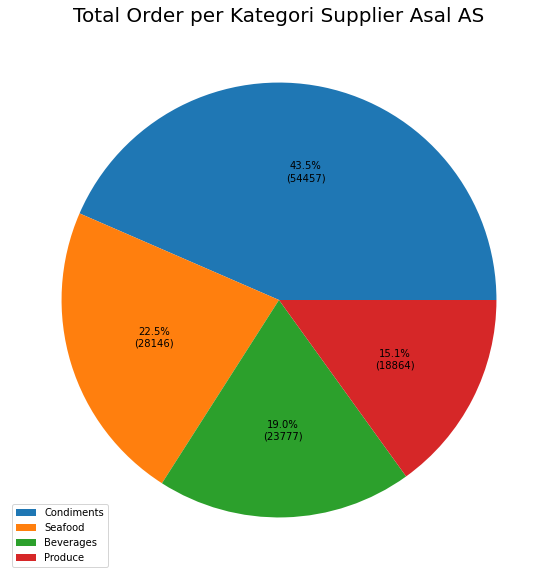

Total Order Supplier Asal AS=125244.15000000001
AS memasok 47.90% dari total seluruh produk bahan penyedap


In [370]:
# Total Order per Kategori Supplier Asal AS

df_usa=tabel1[tabel1['Country']=='USA'].groupby(tabel1['CategoryName']).sum().sort_values('OrderTotal',ascending=False)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,10))
plt.pie(df_usa['OrderTotal'],autopct=autopct_format(df_usa['OrderTotal']))
plt.title ('Total Order per Kategori Supplier Asal AS', size = 20)
plt.legend(df_usa.index)
plt.show()
print('Total Order Supplier Asal AS={}'.format(df_usa['OrderTotal'].sum()))
condperc=((df_usa.iloc[[0]]['OrderTotal'].sum())
      /(tabel1[tabel1['CategoryName']=='Condiments']['OrderTotal'].sum())*100)
print('AS memasok {:.2f}% dari total seluruh produk bahan penyedap'.format(condperc))

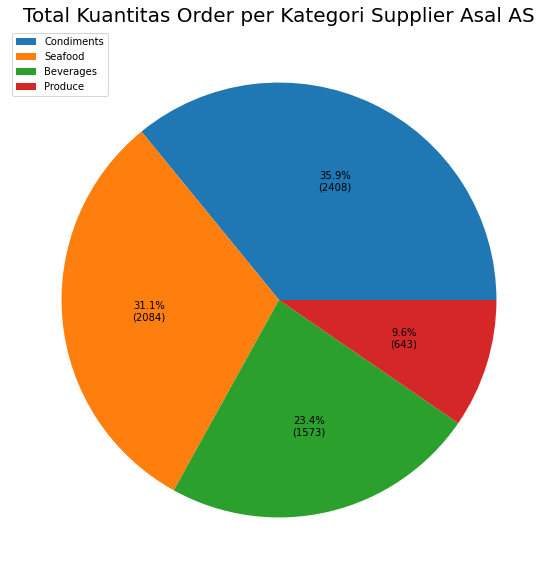

Total Kuantitas Order Supplier Asal AS=6708
AS memasok 1027.88% dari total seluruh produk bahan penyedap


In [371]:
# Total Kuantitas Order per Kategori Supplier Asal AS

df_usa1=tabel1[tabel1['Country']=='USA'].groupby(tabel1['CategoryName']).sum().sort_values('Quantity',ascending=False)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,10))
plt.pie(df_usa1['Quantity'],autopct=autopct_format(df_usa1['Quantity']))
plt.title ('Total Kuantitas Order per Kategori Supplier Asal AS', size = 20)
plt.legend(df_usa.index)
plt.show()
print('Total Kuantitas Order Supplier Asal AS={}'.format(df_usa1['Quantity'].sum()))
condperc=((df_usa1.iloc[[0]]['OrderTotal'].sum())
      /(tabel1[tabel1['CategoryName']=='Condiments']['Quantity'].sum())*100)
print('AS memasok {:.2f}% dari total seluruh produk bahan penyedap'.format(condperc))

Berikut adalah gambaran produk- produk yang dipasok oleh supplier asal AS.
<br>
Supplier AS terlihat cukup banyak memasok produk- produk bahan penyedap (condiment) terhadap Northwind, walaupun ada 3 jenis produk lainnya yang dipasok dari AS. Northwind terlihat sudah melakukan perlakuan yang tepat untuk supplier asal AS, dengan mendiversifikasi produknya kepada banyak supplier, agar Northwind masih mempunyai cadangan supplier lain bila salah satu supplier terkena masalah.

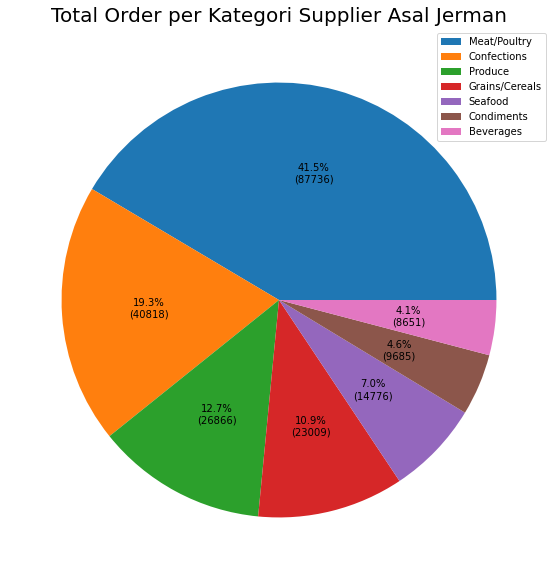

Total Order Supplier Asal Jerman=211540.09


In [372]:
# Total Order per Kategori Supplier Asal Jerman

df_deu=tabel1[tabel1['Country']=='Germany'].groupby(tabel1['CategoryName']).sum().sort_values('OrderTotal',ascending=False)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,10))
plt.pie(df_deu['OrderTotal'],autopct=autopct_format(df_deu['OrderTotal']))
plt.title ('Total Order per Kategori Supplier Asal Jerman', size = 20)
plt.legend(df_deu.index)
plt.show()
print('Total Order Supplier Asal Jerman={}'.format(df_deu['OrderTotal'].sum()))

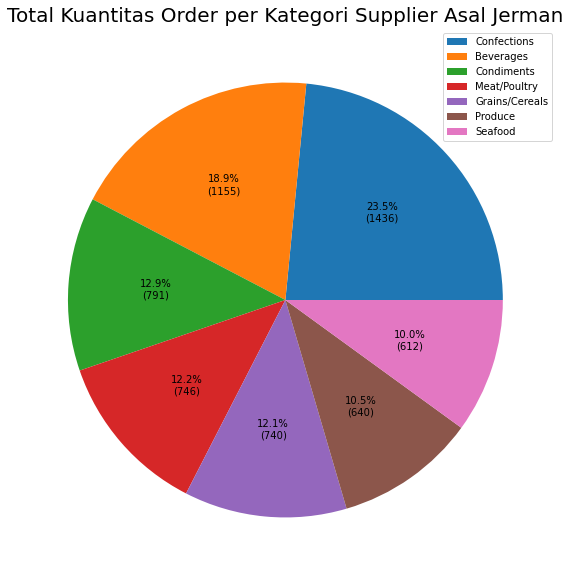

Total Kuantitas Order Supplier Asal Jerman=6120


In [373]:
# Total Kuantitas Order per Kategori Supplier Asal Jerman

df_deu1=tabel1[tabel1['Country']=='Germany'].groupby(tabel1['CategoryName']).sum().sort_values('Quantity',ascending=False)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,10))
plt.pie(df_deu1['Quantity'],autopct=autopct_format(df_deu1['Quantity']))
plt.title ('Total Kuantitas Order per Kategori Supplier Asal Jerman', size = 20)
plt.legend(df_deu1.index)
plt.show()
print('Total Kuantitas Order Supplier Asal Jerman={}'.format(df_deu1['Quantity'].sum()))

Grafik diatas menggambarkan produk- produk yang dipasok oleh Jerman kepada Northwind
<br>
Supplier dari Jerman terlihat memasok banyak jenis produk. Namun, hal yang menarik adalah produk daging dari Jerman yang didapat Northwind hanya dipasok oleh satu perusahaan saja, yaitu Plutzer Lebensmittelgromrkte AG. Walaupun ada supplier dari negara lain, namun secara nilai, produk daging dari Plutzer Lebensmittelgromrkte AG terlihat memiliki porsi sebesar 49,23% dari total order Northwind. Hal ini tentunya tidak ideal dan ada baiknya Northwind melakukan diversifikasi supplier sambil melakukan pendekatan intens dengan supplier Plutzer Lebensmittelgromrkte AG.

### *NORMALITY TEST*

Pada bagian ini, kita akan melakukan tes normalitas (shapiro test) untuk data- data numerik pada tabel utama *tabel1*. Terlihat dari semua data- data numerik yang akan dianalisis, tidak ada yang berdistribusi normal. Hal tersebut terindikasi pada boxplot, namun tes statistik membuktikannya dengan pasti.

In [374]:
# Import Library

from scipy.stats import shapiro

In [375]:
# Normality Test OrderTotal

norm, pval = shapiro(tabel1['OrderTotal'])

if pval < 0.05 :
    print ('Data Tidak Berdistribusi Normal karena Tolak H0 (pval<5%)')
else:
    print ('Data Berdistribusi Normal karena Terima H0 (pval>5%)')

Data Tidak Berdistribusi Normal karena Tolak H0 (pval<5%)


In [376]:
# Normality Test Quantity

norm, pval = shapiro(tabel1['Quantity'])

if pval < 0.05 :
    print ('Data Tidak Berdistribusi Normal karena Tolak H0 (pval<5%)')
else:
    print ('Data Berdistribusi Normal karena Terima H0 (pval>5%)')

Data Tidak Berdistribusi Normal karena Tolak H0 (pval<5%)


In [377]:
# Normality Test UnitPrice

norm, pval = shapiro(tabel1['UnitPrice'])

if pval < 0.05 :
    print ('Data Tidak Berdistribusi Normal karena Tolak H0 (pval<5%)')
else:
    print ('Data Berdistribusi Normal karena Terima H0 (pval>5%)')

Data Tidak Berdistribusi Normal karena Tolak H0 (pval<5%)


### *HYPOTHESIS TESTING*

Pada bagian ini, kita akan melakukan hypotesis testing. Variabel yang digunakan untuk tes ini adalah variabel **Country (Negara Asal Supplier), OrderTotal**, dan **Quantity**. Metode hypotesis testing yang digunakan adalah Kruskal Wallis dan Mann Whitney dikarenakan distribusi data dari variabel yang digunakan terlihat tidak normal.

In [378]:
from scipy.stats import kruskal
krus, pvalkrus = kruskal(
    tabel1[tabel1['Country'] == 'UK']['OrderTotal'],
    tabel1[tabel1['Country'] == 'USA']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Japan']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Spain']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Australia']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Sweden']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Brazil']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Germany']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Italy']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Norway']['OrderTotal'],
    tabel1[tabel1['Country'] == 'France']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Singapore']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Denmark']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Netherlands']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Finland']['OrderTotal'],
    tabel1[tabel1['Country'] == 'Canada']['OrderTotal'],
) 
if pvalkrus < 0.05 :
    print ('Terdapat Perbedaan Nilai Median Order Total pada Setiap Product Yang Ada karena pval = {} (< 5%)'.format(pvalkrus))
else :
    print ('Tidak Terdapat Perbedaan Nilai Median Order Total pada Setiap Product Yang Ada karena pval = {} (> 5%)'.format(pvalkrus))                             

Terdapat Perbedaan Nilai Median Order Total pada Setiap Product Yang Ada karena pval = 4.506809587693244e-45 (< 5%)


In [379]:
from scipy.stats import kruskal
krus, pvalkrus = kruskal(
    tabel1[tabel1['Country'] == 'UK']['Quantity'],
    tabel1[tabel1['Country'] == 'USA']['Quantity'],
    tabel1[tabel1['Country'] == 'Japan']['Quantity'],
    tabel1[tabel1['Country'] == 'Spain']['Quantity'],
    tabel1[tabel1['Country'] == 'Australia']['Quantity'],
    tabel1[tabel1['Country'] == 'Sweden']['Quantity'],
    tabel1[tabel1['Country'] == 'Brazil']['Quantity'],
    tabel1[tabel1['Country'] == 'Germany']['Quantity'],
    tabel1[tabel1['Country'] == 'Italy']['Quantity'],
    tabel1[tabel1['Country'] == 'Norway']['Quantity'],
    tabel1[tabel1['Country'] == 'France']['Quantity'],
    tabel1[tabel1['Country'] == 'Singapore']['Quantity'],
    tabel1[tabel1['Country'] == 'Denmark']['Quantity'],
    tabel1[tabel1['Country'] == 'Netherlands']['Quantity'],
    tabel1[tabel1['Country'] == 'Finland']['Quantity'],
    tabel1[tabel1['Country'] == 'Canada']['Quantity'],
) 
if pvalkrus < 0.05 :
    print ('Terdapat Perbedaan Nilai Median Kuantitas pada Setiap Product Yang Ada karena pval = {} (< 5%)'.format(pvalkrus))
else :
    print ('Tidak Terdapat Perbedaan Nilai Median Kuantitas pada Setiap Product Yang Ada karena pval = {} (> 5%)'.format(pvalkrus))     

Tidak Terdapat Perbedaan Nilai Median Kuantitas pada Setiap Product Yang Ada karena pval = 0.13548618500258566 (> 5%)


In [380]:
from scipy.stats import kruskal
krus, pval = kruskal(
    tabel1[tabel1['Country'] == 'UK']['UnitPrice'],
    tabel1[tabel1['Country'] == 'USA']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Japan']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Spain']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Australia']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Sweden']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Brazil']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Germany']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Italy']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Norway']['UnitPrice'],
    tabel1[tabel1['Country'] == 'France']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Singapore']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Denmark']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Netherlands']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Finland']['UnitPrice'],
    tabel1[tabel1['Country'] == 'Canada']['UnitPrice'],
) 
if pval < 0.05 :
    print ('Terdapat Perbedaan Nilai Median Harga pada Setiap Product Yang Ada karena pval = {} (< 5%)'.format(pval))
else :
    print ('Tidak Terdapat Perbedaan Nilai Median Harga pada Setiap Product Yang Ada karena pval = {} (> 5%)'.format(pval)) 

Terdapat Perbedaan Nilai Median Harga pada Setiap Product Yang Ada karena pval = 1.0121424936826572e-100 (< 5%)


Hasil testing Kruskal Wallis diatas menunjukkan adanya perbedaan nilai median bila negara asal supplier dibandingkan dengan harga unit dan juga nilai order namun tidak ada perbedaan nilai median bila negara asal supplier dibandingkan dengan kuantitas order.
<br>
Hal ini mengindikasikan bahwa setiap negara memiliki produk unggulan yang disukai oleh pelanggan. Northwind harus jeli mengidentifikasi produk unggulan di tiap negara agar stok produk yang diminati pelanggan tetap terjaga. Selain itu, Northwind juga bisa mengidentifikasi produk- produk tiap negara agar dapat mendiversifikasi suppliernya dengan baik. 

In [381]:
from scipy.stats import mannwhitneyu
ustat, pval=mannwhitneyu(tabel1['SupplierID'],tabel1['Quantity'])
if pval < 0.05 :
    print ('Terdapat Perbedaan Nilai Median Order Kuantitas Supplier pada Setiap Product Yang Ada karena pval = {} (< 5%)'.format(pval))
else :
    print ('Tidak Terdapat Perbedaan Nilai Median Order Kuantitas Supplier pada Setiap Product Yang Ada karena pval = {} (> 5%)'.format(pval))

Terdapat Perbedaan Nilai Median Order Kuantitas Supplier pada Setiap Product Yang Ada karena pval = 7.093126423921773e-59 (< 5%)


Hasil testing Mann Whitney diatas menunjukkan adanya perbedaan nilai median bila supplier dibandingkan dengan kuantitas order.
<br>
Sejalan dengan hasil testing Kruskal Wallis, perbedaan tidak hanya ada di negara asal Supplier, namun juga ada di entitas- entitas supplier tersebut. Selain dari screening negara, Northwind juga harus jeli mengidentifikasi kemampuan dan produk unggulan masing- masing supplier di suatu negara.

### *CORRELATION*

Pada bagian ini, kita akan mengidentifikasi korelasi antar variabel numerik yang ada pada *tabel1*. Metode korelasi yang digunakan adalah korelasi spearman karena adanya data kategorik seperti SupplierID dan ProductID dan juga data- data lainnya yang tidak menyebar normal.
<br>
Berdasarkan hasil korelasi, terlihat korelasi antar variabel cenderung lemah. Korelasi cukup tinggi hanya terlihat pada variabel- variabel komponen OrderTotal. Korelasi lainnya yang cukup tinggi ada korelasi antara ProductID dan SupplierID. Hal ini mengindikasikan bahwa tiap supplier terlihat memiliki produk unggulan tertentu yang hanya bisa dipasok oleh dirinya sendiri.

<AxesSubplot:>

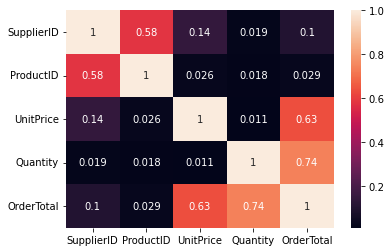

In [382]:
sns.heatmap(tabel1[['SupplierID','ProductID','UnitPrice','Quantity','OrderTotal']].corr('spearman'),annot=True)